# Problem_statement(fireforests)
- PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, r2_score
import warnings
warnings.filterwarnings('ignore')

In [130]:
#Import a Dataset
df=pd.read_csv(r'C:\Users\admin\Documents\Data Science\Assignment\Neural_Networks\forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# EDA

In [131]:
#check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [132]:
#check for null values
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [133]:
#check for duplicates
df.duplicated().sum()

8

In [134]:
#drop the duplicates
df.drop_duplicates(inplace=True)

In [135]:
#check for duplicates
df.duplicated().sum()

0

In [136]:
#Reset the index
df.reset_index(inplace=True)

In [137]:
df.shape

(509, 32)

In [138]:
df.columns

Index(['index', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun',
       'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec',
       'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay',
       'monthnov', 'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [139]:
#drop the unnecessory columns:
df.drop(columns={'dayfri','daymon', 'daysat', 'daysun',
       'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec',
       'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay',
       'monthnov', 'monthoct', 'monthsep','index'}, axis=1, inplace=True)

In [140]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
504,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
505,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
506,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
507,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [141]:
#Descriptive Statestics
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


# VISUALIZATION

In [142]:
df1=df.copy()
cat_features=df1.describe(include=['object']).columns
cat_features

Index(['month', 'day', 'size_category'], dtype='object')

In [143]:
num_features=df1.describe(include=['float64','int64']).columns
num_features

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'], dtype='object')

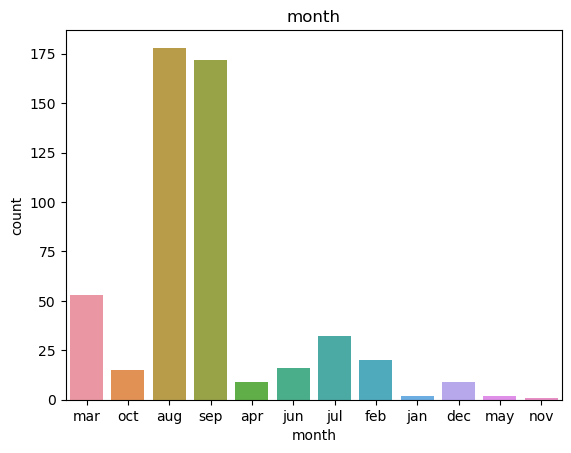

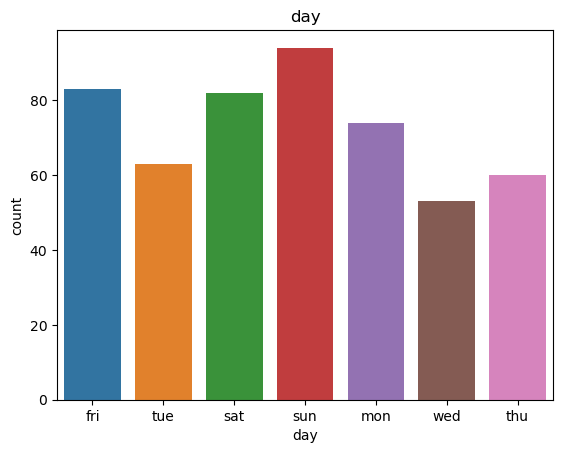

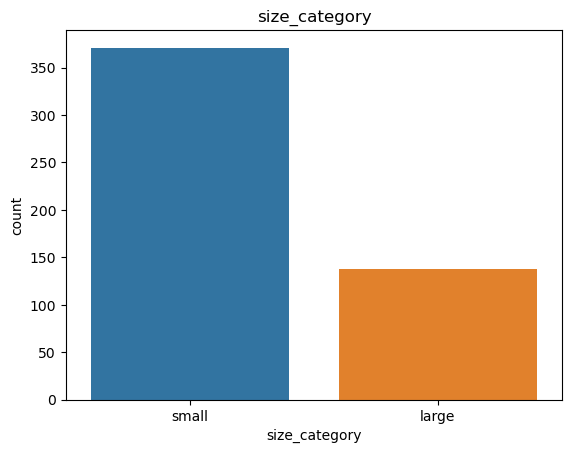

In [144]:
for feature in cat_features:
    sns.countplot(x=df1[feature])
    plt.title(feature)
    plt.show()

# Feature Engineering
- Feature Encoding
- Feature Scaling

In [145]:
df1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
504,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
505,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
506,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
507,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [146]:
x=df1.drop('size_category', axis=1)
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
504,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
505,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
506,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
507,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [147]:
y=df1['size_category']
y

0      small
1      small
2      small
3      small
4      small
       ...  
504    large
505    large
506    large
507    small
508    small
Name: size_category, Length: 509, dtype: object

In [148]:
x=pd.get_dummies(columns=['month', 'day'], data=x)
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0,...,0,0,0,1,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,1,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,1,0,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0,...,0,0,0,1,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,1,0,0,0
505,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,1,0,0,0
506,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,1,0,0,0
507,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0


In [149]:
#feature Scaling
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.79603981, -1.31838569, -1.82893094, ..., -0.36555477,
        -0.37583987, -0.34092238],
       [-0.00325666, -1.1740525 ,  0.48925693, ..., -0.36555477,
         2.66070763, -0.34092238],
       [-0.00325666, -1.04383887,  0.56104493, ..., -0.36555477,
        -0.37583987, -0.34092238],
       ...,
       [-1.62485856, -0.8398898 ,  0.47514131, ..., -0.36555477,
        -0.37583987, -0.34092238],
       [ 0.68141971,  0.56108339,  0.26985988, ..., -0.36555477,
        -0.37583987, -0.34092238],
       [-2.00323234, -1.68235633, -1.77892132, ..., -0.36555477,
         2.66070763, -0.34092238]])

In [150]:
#Label Encoding for target column
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Model Building

In [151]:
#Split the data into Train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20, random_state=1)

In [152]:
#Model Building

#Initialize the ANN
ann=Sequential()

#Create a Hidden Layer
ann.add(Dense(units=10, activation='relu'))

#Create a Output Layer
ann.add(Dense(units=1, activation='sigmoid'))

#Establist the connection between all the layers
ann.compile(optimizer='adam', loss='binary_crossentropy')

#Train the ANN
ann.fit(xtrain,ytrain, epochs=100, validation_data=(xtest,ytest))

Epoch 1/100
13/13 [==============================] - 2s 37ms/step - loss: 1.1072 - val_loss: 1.2172
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 1.0312 - val_loss: 1.1450
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 0.9651 - val_loss: 1.0819
Epoch 4/100
13/13 [==============================] - 0s 11ms/step - loss: 0.9077 - val_loss: 1.0256
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.8604 - val_loss: 0.9758
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 0.8177 - val_loss: 0.9324
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.7814 - val_loss: 0.8956
Epoch 8/100
13/13 [==============================] - 0s 8ms/step - loss: 0.7499 - val_loss: 0.8638
Epoch 9/100
13/13 [==============================] - 0s 9ms/step - loss: 0.7224 - val_loss: 0.8369
Epoch 10/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6982 - val_loss: 0.8133
Epoch 1

13/13 [==============================] - 0s 10ms/step - loss: 0.3695 - val_loss: 0.5630
Epoch 83/100
13/13 [==============================] - 0s 10ms/step - loss: 0.3668 - val_loss: 0.5612
Epoch 84/100
13/13 [==============================] - 0s 10ms/step - loss: 0.3647 - val_loss: 0.5621
Epoch 85/100
13/13 [==============================] - 0s 12ms/step - loss: 0.3624 - val_loss: 0.5623
Epoch 86/100
13/13 [==============================] - 0s 12ms/step - loss: 0.3603 - val_loss: 0.5617
Epoch 87/100
13/13 [==============================] - 0s 8ms/step - loss: 0.3580 - val_loss: 0.5605
Epoch 88/100
13/13 [==============================] - 0s 9ms/step - loss: 0.3559 - val_loss: 0.5632
Epoch 89/100
13/13 [==============================] - 0s 8ms/step - loss: 0.3538 - val_loss: 0.5610
Epoch 90/100
13/13 [==============================] - 0s 9ms/step - loss: 0.3516 - val_loss: 0.5615
Epoch 91/100
13/13 [==============================] - 0s 8ms/step - loss: 0.3497 - val_loss: 0.5621
Epoch 92

In [153]:
ann.history.history

{'loss': [1.1072465181350708,
  1.0312117338180542,
  0.9651023149490356,
  0.9076709747314453,
  0.8604015707969666,
  0.817729651927948,
  0.7813569903373718,
  0.749853789806366,
  0.722396969795227,
  0.6982168555259705,
  0.6776701807975769,
  0.6595044136047363,
  0.6433573365211487,
  0.6289404034614563,
  0.6164807081222534,
  0.6050616502761841,
  0.5954828262329102,
  0.5860577821731567,
  0.5779387354850769,
  0.5704396963119507,
  0.5634203553199768,
  0.5571205019950867,
  0.5512645840644836,
  0.5455800890922546,
  0.5399812459945679,
  0.5348767638206482,
  0.5299798250198364,
  0.5254216194152832,
  0.5211982727050781,
  0.5168775320053101,
  0.5130791664123535,
  0.5091622471809387,
  0.5053790211677551,
  0.5016387104988098,
  0.49816033244132996,
  0.4945904314517975,
  0.49109336733818054,
  0.4873605966567993,
  0.4843785762786865,
  0.4806113541126251,
  0.4774762690067291,
  0.4742134213447571,
  0.4711509644985199,
  0.46804070472717285,
  0.4652838110923767,
  

In [154]:
loss=pd.DataFrame(ann.history.history)
loss

,loss,val_loss
0,1.107247,1.217211
1,1.031212,1.145029
2,0.965102,1.081854
3,0.907671,1.025635
4,0.860402,0.975821
...,...,...
95,0.338794,0.561212
96,0.336592,0.561050
97,0.334380,0.559301
98,0.332381,0.560743


<AxesSubplot:>

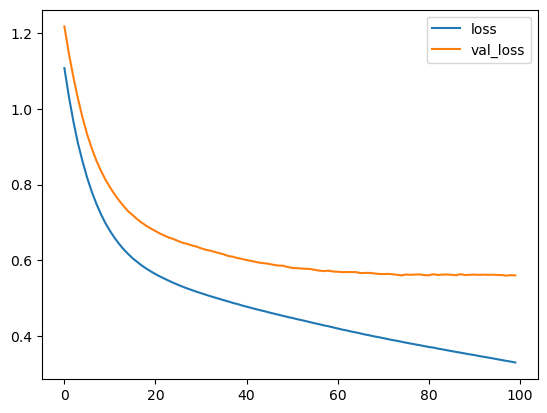

In [155]:
loss.plot()

In [156]:
ypred=ann.predict(xtest)
ypred=ypred>0.5
ypred

4/4 [==============================] - 0s 3ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [

In [157]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.77      0.40      0.53        25
           1       0.83      0.96      0.89        77

    accuracy                           0.82       102
   macro avg       0.80      0.68      0.71       102
weighted avg       0.82      0.82      0.80       102



## 1. Early Stop method

In [158]:
from tensorflow.keras.callbacks import EarlyStopping

In [159]:
early=EarlyStopping(monitor='val_loss',mode='min',patience=20)

In [160]:
#Initialize the ann

ann = Sequential()

#Create the hidden layer
ann.add(Dense(units=10, activation='relu'))

#Create the o/p layer
ann.add(Dense(units=1, activation='sigmoid'))

#Establish the connection between all the layers
ann.compile(optimizer='adam', loss='binary_crossentropy')

#Train ANN
ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),callbacks=[early],epochs=100)

Epoch 1/100
13/13 [==============================] - 2s 26ms/step - loss: 0.9327 - val_loss: 0.9010
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.8654 - val_loss: 0.8444
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.8041 - val_loss: 0.7979
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.7564 - val_loss: 0.7578
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.7183 - val_loss: 0.7242
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6828 - val_loss: 0.6989
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6568 - val_loss: 0.6787
Epoch 8/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6340 - val_loss: 0.6636
Epoch 9/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6166 - val_loss: 0.6514
Epoch 10/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6000 - val_loss: 0.6420
Epoch 11

13/13 [==============================] - 0s 9ms/step - loss: 0.3500 - val_loss: 0.6151


In [161]:
early_loss=pd.DataFrame(ann.history.history)
early_loss

,loss,val_loss
0,0.932674,0.900982
1,0.865413,0.844420
2,0.804080,0.797944
3,0.756418,0.757821
4,0.718278,0.724186
...,...,...
77,0.358292,0.612607
78,0.356071,0.613999
79,0.354020,0.614612
80,0.352258,0.615852


<AxesSubplot:>

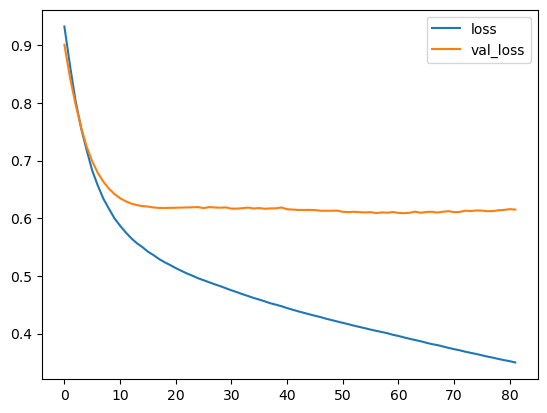

In [162]:
early_loss.plot()

## 2. Drop Out Layer

In [163]:
from tensorflow.keras.layers import Dropout

In [164]:
#Initialize the ann

ann = Sequential()

#Create the hidden layer
ann.add(Dense(units=10, activation='relu'))
ann.add(Dropout(rate=0.5))

#Create the another hidden layer
ann.add(Dense(units=15, activation='relu'))
ann.add(Dropout(rate=0.5))

#Create the o/p layer
ann.add(Dense(units=1, activation='sigmoid'))

#Establish the connection between all the layers
ann.compile(optimizer='adam', loss='binary_crossentropy')

#Train ANN
ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100)

Epoch 1/100
13/13 [==============================] - 3s 30ms/step - loss: 0.8416 - val_loss: 0.6284
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6608 - val_loss: 0.6122
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.7041 - val_loss: 0.6021
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.7628 - val_loss: 0.5957
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 0.7807 - val_loss: 0.5900
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 0.7227 - val_loss: 0.5875
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 0.7197 - val_loss: 0.5856
Epoch 8/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6732 - val_loss: 0.5830
Epoch 9/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6628 - val_loss: 0.5810
Epoch 10/100
13/13 [==============================] - 0s 10ms/step - loss: 0.6595 - val_loss: 0.5785
Epoch 1

Epoch 83/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5489 - val_loss: 0.5510
Epoch 84/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5446 - val_loss: 0.5507
Epoch 85/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5390 - val_loss: 0.5500
Epoch 86/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5371 - val_loss: 0.5508
Epoch 87/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5413 - val_loss: 0.5521
Epoch 88/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5223 - val_loss: 0.5531
Epoch 89/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5247 - val_loss: 0.5544
Epoch 90/100
13/13 [==============================] - 0s 8ms/step - loss: 0.5449 - val_loss: 0.5551
Epoch 91/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5214 - val_loss: 0.5554
Epoch 92/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5418 - val_loss: 0.5558


In [165]:
dropout_loss=pd.DataFrame(ann.history.history)
dropout_loss

,loss,val_loss
0,0.841573,0.628433
1,0.660832,0.612213
2,0.704127,0.602057
3,0.762843,0.595667
4,0.780709,0.590018
...,...,...
95,0.531800,0.560280
96,0.518553,0.561854
97,0.528822,0.562533
98,0.533881,0.563561


<AxesSubplot:>

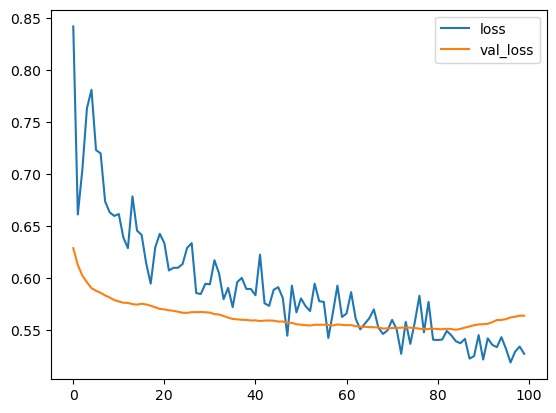

In [166]:
dropout_loss.plot()

## 3.Early Stopping+Drop out Layer

In [167]:
#Initialize the ann

ann = Sequential()

#Create the hidden layer
ann.add(Dense(units=10, activation='relu'))
ann.add(Dropout(rate=0.5))

#Create the another hidden layer
ann.add(Dense(units=15, activation='relu'))
ann.add(Dropout(rate=0.5))

#Create the o/p layer
ann.add(Dense(units=1, activation='sigmoid'))

#Establish the connection between all the layers
ann.compile(optimizer='adam', loss='binary_crossentropy')

#Train ANN
ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),callbacks=[early],epochs=100)

Epoch 1/100
13/13 [==============================] - 2s 28ms/step - loss: 1.0192 - val_loss: 0.7044
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.8371 - val_loss: 0.6670
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.8770 - val_loss: 0.6440
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.8403 - val_loss: 0.6266
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.7760 - val_loss: 0.6133
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.8238 - val_loss: 0.6051
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.7802 - val_loss: 0.5973
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6771 - val_loss: 0.5923
Epoch 9/100
13/13 [==============================] - 0s 7ms/step - loss: 0.7641 - val_loss: 0.5893
Epoch 10/100
13/13 [==============================] - 0s 8ms/step - loss: 0.7619 - val_loss: 0.5850
Epoch 11

In [168]:
dropout_loss_early=pd.DataFrame(ann.history.history)
dropout_loss_early

,loss,val_loss
0,1.019245,0.704434
1,0.837145,0.666958
2,0.877007,0.643960
3,0.840314,0.626646
4,0.775982,0.613307
5,0.823761,0.605060
6,0.780203,0.597294
7,0.677113,0.592288
8,0.764110,0.589296
9,0.761857,0.584965


<AxesSubplot:>

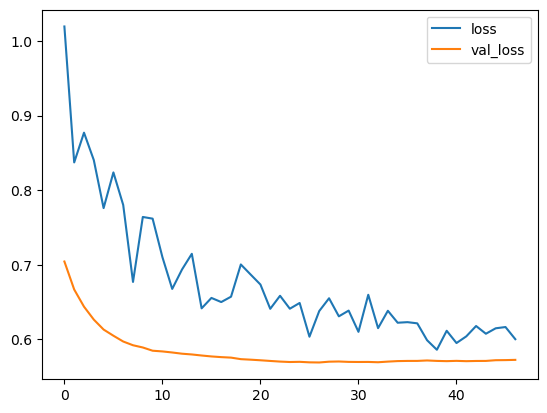

In [169]:
dropout_loss_early.plot()

# Compare Performance

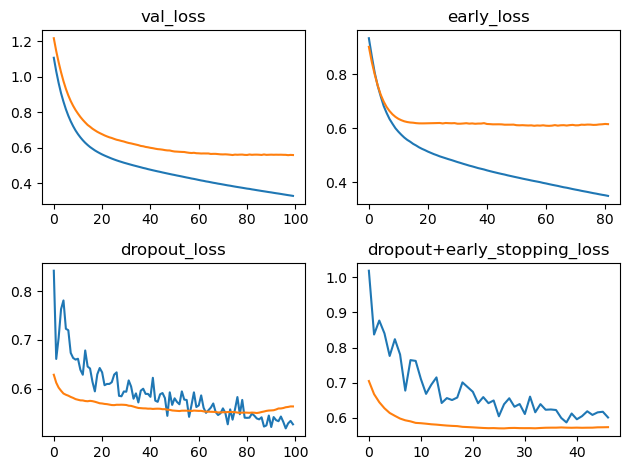

In [170]:
plt.subplot(2,2,1)
plt.plot(loss)
plt.title('val_loss')

plt.subplot(2,2,2)
plt.plot(early_loss)
plt.title('early_loss')

plt.subplot(2,2,3)
plt.plot(dropout_loss)
plt.title('dropout_loss')

plt.subplot(2,2,4)
plt.plot(dropout_loss_early)
plt.title('dropout+early_stopping_loss')

plt.tight_layout()

# Hyperparameter Tuning

In [171]:
import keras_tuner as kt

In [172]:
def build_model(hp):
    model=Sequential()
    model.add(Dense(units=10, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    opti=hp.Choice('optimizer',values=['adam','sgd','rmsprop','adadelta'])
    model.compile(optimizer=opti, loss = 'binary_crossentropy', metrics = 'accuracy')
    
    return modelg


In [173]:
tuner=kt.RandomSearch(hypermodel=build_model, 
                      objective='val_accuracy',
                      max_trials=5,  
                      directory = 'project',
                      project_name = 'ANN')

INFO:tensorflow:Reloading Tuner from project\ANN\tuner0.json


In [174]:
tuner.search(xtrain,ytrain,epochs=5, validation_data=(xtest,ytest))

INFO:tensorflow:Oracle triggered exit


In [175]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

# Final Model

In [176]:
#Initialize the ann

final_model = Sequential()

#Create the hidden layer
final_model.add(Dense(units=10, activation='relu'))
final_model.add(Dropout(rate=0.5))

#Create the another hidden layer
final_model.add(Dense(units=15, activation='relu'))
final_model.add(Dropout(rate=0.5))

#Create the o/p layer
final_model.add(Dense(units=1, activation='sigmoid'))

#Establish the connection between all the layers
final_model.compile(optimizer='adam', loss='binary_crossentropy')

#Train ANN
final_model.fit(xtrain,ytrain,validation_data=(xtest,ytest),callbacks=[early],epochs=100)

Epoch 1/100
13/13 [==============================] - 2s 26ms/step - loss: 0.8646 - val_loss: 0.7634
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.8119 - val_loss: 0.7236
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.8231 - val_loss: 0.6955
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.7804 - val_loss: 0.6746
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6675 - val_loss: 0.6623
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.7446 - val_loss: 0.6499
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.7462 - val_loss: 0.6408
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6929 - val_loss: 0.6345
Epoch 9/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6971 - val_loss: 0.6292
Epoch 10/100
13/13 [==============================] - 0s 7ms/step - loss: 0.7066 - val_loss: 0.6268
Epoch 11

13/13 [==============================] - 0s 7ms/step - loss: 0.4940 - val_loss: 0.5778
Epoch 84/100
13/13 [==============================] - 0s 8ms/step - loss: 0.4999 - val_loss: 0.5779
Epoch 85/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5049 - val_loss: 0.5773
Epoch 86/100
13/13 [==============================] - 0s 7ms/step - loss: 0.4869 - val_loss: 0.5763
Epoch 87/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5094 - val_loss: 0.5753
Epoch 88/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5084 - val_loss: 0.5760
Epoch 89/100
13/13 [==============================] - 0s 7ms/step - loss: 0.4973 - val_loss: 0.5755
Epoch 90/100
13/13 [==============================] - 0s 7ms/step - loss: 0.4728 - val_loss: 0.5746
Epoch 91/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5017 - val_loss: 0.5741
Epoch 92/100
13/13 [==============================] - 0s 7ms/step - loss: 0.4878 - val_loss: 0.5745
Epoch 93/100


In [177]:
ypred=final_model.predict(xtest)
ypred

4/4 [==============================] - 0s 3ms/step


array([[0.7566529 ],
       [0.75750595],
       [0.84886193],
       [0.7347186 ],
       [0.7589284 ],
       [0.6386913 ],
       [0.80560803],
       [0.6762433 ],
       [0.4473639 ],
       [0.84411883],
       [0.8768179 ],
       [0.7612016 ],
       [0.856562  ],
       [0.7617423 ],
       [0.803507  ],
       [0.7403218 ],
       [0.7605816 ],
       [0.31073904],
       [0.7483895 ],
       [0.7482741 ],
       [0.7229673 ],
       [0.78756946],
       [0.70376337],
       [0.75234014],
       [0.7580734 ],
       [0.76810384],
       [0.86602795],
       [0.73053044],
       [0.82276523],
       [0.99991834],
       [0.7867805 ],
       [0.89372677],
       [0.75692624],
       [0.777766  ],
       [0.86466163],
       [0.7139299 ],
       [0.76326275],
       [0.59056795],
       [0.6667119 ],
       [0.90898305],
       [0.77545047],
       [0.76691145],
       [0.66227156],
       [0.7402136 ],
       [0.8480575 ],
       [0.7827886 ],
       [0.7204929 ],
       [0.840

In [178]:
ypred=ypred>0.5

In [179]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.80      0.16      0.27        25
           1       0.78      0.99      0.87        77

    accuracy                           0.78       102
   macro avg       0.79      0.57      0.57       102
weighted avg       0.79      0.78      0.72       102

